In [130]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [207]:
# Here's a little function to see whether our malicious mathematicians will attack on a given day
def attack(date):
    if date.day*date.month == (date.year-2000):
        return True
    else:
        return False

# Now to find all dates where there is an attack
start, end = dt.datetime(2001, 1,1), dt.datetime(2099, 12, 31)
dates = np.array([start + dt.timedelta(days=i) for i in range((end-start).days+1)])
attack_dates = [date for date in dates if attack(date)]
print("total number of attacks: {}".format(len(attack_dates)))

total number of attacks: 212


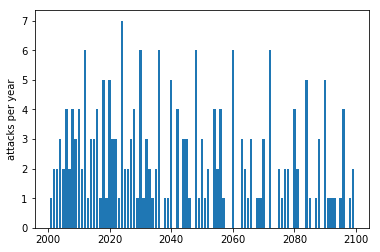

In [208]:
# lets have a look at how many attacks occur per year
all_years = np.array(sorted(list(set([i.year for i in dates])))) # lazy way to get a list of years
attack_years = [i.year for i in attack_dates]  # these are just the years for each attack date
attacks_per_year = np.array([attack_years.count(y) for y in all_years])
plt.bar(all_years, attacks_per_year)
plt.ylabel('attacks per year');

In [209]:
# now to find the worst year. We're going to leave it flexible to multiple worst years,
# even though we can see from the above graph that there's only one worst year.
most_attacks = max(attacks_per_year)
worst_years = [all_years[i] for i in np.where(attacks_per_year == most_attacks)[0]]
print("worst year(s): {} ({} attacks)".format(worst_years, most_attacks))

worst year(s): [2024] (7 attacks)


In [210]:
# now for to best years:
least_attacks = min(attacks_per_year)
best_years = [all_years[i] for i in np.where(attacks_per_year == least_attacks)[0]]
print("best year(s): {} ({} attacks)".format(best_years, least_attacks))

best year(s): [2037, 2041, 2043, 2047, 2053, 2058, 2059, 2061, 2062, 2067, 2071, 2073, 2074, 2079, 2082, 2083, 2086, 2089, 2094, 2097] (0 attacks)


There's a lull of 1097 days between 2057-03-19 and 2060-03-20


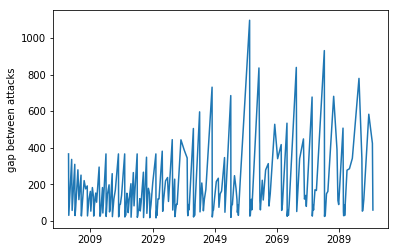

In [211]:
# now to find the longest period of peace:
days_since_attack = np.array([(attack_dates[i+1]-attack_dates[i]).days for i in range(len(attack_dates)-1)])
longest_gap = max(days_since_attack)
plt.plot(attack_dates[1:], days_since_attack)
plt.ylabel("gap between attacks")
start_of_respite = attack_dates[np.where(days_since_attack == longest_gap)[0][0]].date()
end_of_respite = attack_dates[np.where(days_since_attack == longest_gap)[0][0]+1].date()
print("There's a lull of {} days between {} and {}".format(longest_gap, start_of_respite, end_of_respite))